In [ ]:
#import library
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#opening pickle file of augmented added data
with open('../data/external/combined_augmented_data_v3.pkl','rb') as f:
    X_train,Y_train,X_test,Y_test = pickle.load(f)

In [3]:
# Load extracted features and labels
with open('../data/external/extracted_features_on_v3.npy', 'rb') as f:
    features = np.load(f)

In [14]:

# Define the class names
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [5]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (109820, 28, 28)
Y_train shape: (109820,)
X_test shape: (28688, 28, 28)
Y_test shape: (28688,)


In [7]:
#printing the shape of features
features.shape

(109820, 400)

In [9]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, Y_train, test_size=0.2, random_state=42)


In [ ]:
#reshape to 784
# x_train =x_train.reshape(x_train.shape[0], -1)
# x_test =X_test.reshape(X_test.shape[0], -1)


In [10]:
gnb = GaussianNB()

In [15]:
# applying NB 
gnb.fit(x_train, y_train)
y_pred_sc =gnb.predict(x_test)
y_pred_train = gnb.predict(x_train)


print(f"Accuracy Test: {accuracy_score(y_test, y_pred_sc)}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train)}")

print("Classification report:")
print(classification_report(y_test, y_pred_sc, target_names=letters))

Accuracy Test: 0.2011018029502823
Accuracy Train: 0.20317337461300308
Classification report:
              precision    recall  f1-score   support

           A       0.42      0.06      0.11       920
           B       0.26      0.13      0.18       815
           C       0.54      0.39      0.45       952
           D       0.20      0.08      0.11       957
           E       0.24      0.34      0.28       804
           F       0.57      0.13      0.21       983
           G       0.37      0.24      0.29       800
           H       0.67      0.05      0.09       808
           I       0.10      0.33      0.15       912
           K       0.31      0.27      0.29       889
           L       0.30      0.27      0.28       991
           M       0.16      0.02      0.04       850
           N       0.30      0.05      0.08       908
           O       0.60      0.15      0.25       924
           P       0.58      0.22      0.32       887
           Q       0.77      0.36      0.4

In [16]:
lr = LogisticRegression()

In [17]:
# applying NB 
lr.fit(x_train, y_train)
y_pred_sc =lr.predict(x_test)
y_pred_train = lr.predict(x_train)


print(f"Accuracy Test: {accuracy_score(y_test, y_pred_sc)}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train)}")

print("Classification report:")
print(classification_report(y_test, y_pred_sc, target_names=letters))

C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Test: 0.5556364960845019
Accuracy Train: 0.5581064469131306
Classification report:
              precision    recall  f1-score   support

           A       0.51      0.70      0.59       920
           B       0.62      0.65      0.63       815
           C       0.83      0.78      0.80       952
           D       0.52      0.38      0.43       957
           E       0.56      0.47      0.51       804
           F       0.72      0.61      0.66       983
           G       0.58      0.66      0.62       800
           H       0.52      0.53      0.53       808
           I       0.43      0.46      0.45       912
           K       0.48      0.66      0.56       889
           L       0.54      0.74      0.63       991
           M       0.55      0.28      0.37       850
           N       0.50      0.44      0.47       908
           O       0.73      0.72      0.73       924
           P       0.69      0.74      0.71       887
           Q       0.81      0.85      0.83

In [18]:
#define sklearn LDA object 
lda = LinearDiscriminantAnalysis()
#fit on training data 
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

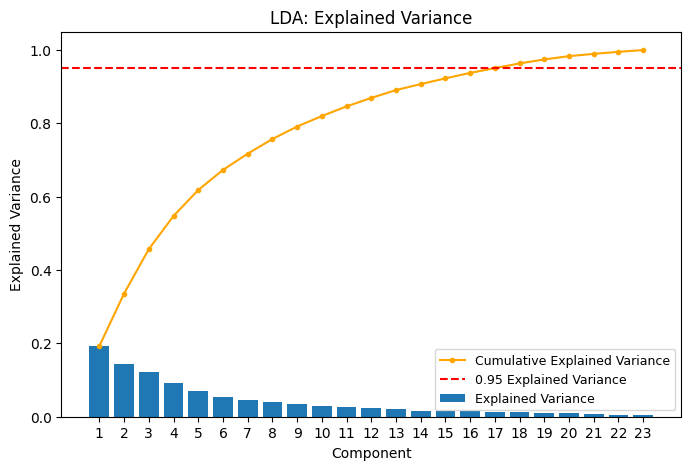

In [19]:
#getting explained variance ratio from the lda model 
evr = lda.explained_variance_ratio_
components = range(1, len(evr) + 1)

#plotting scree plot
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x = components, height = evr, label = 'Explained Variance');
plt.plot(components, np.cumsum(evr), marker = '.', color = 'orange', label = 'Cumulative Explained Variance')
plt.axhline(y = .95, color = 'r', linestyle = '--', label = '0.95 Explained Variance')
plt.xticks(range(1, len(evr)+1));
plt.title('LDA: Explained Variance');
plt.xlabel('Component');
plt.ylabel('Explained Variance');
plt.legend(fontsize = 9);

In [20]:
#fit on training data and transform
x_train_lda = lda.fit_transform(x_train,y_train)
x_test_lda = lda.transform(x_test)

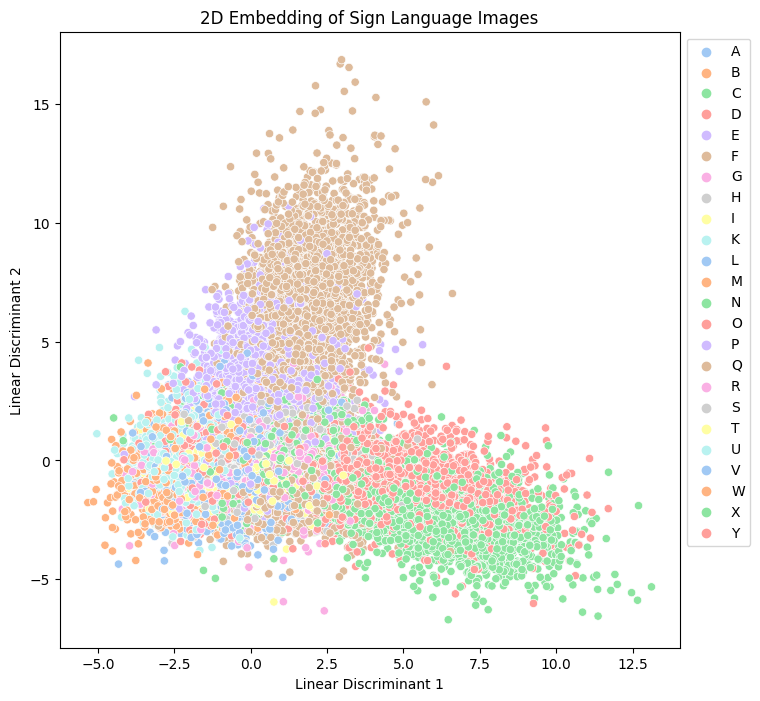

In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x = x_train_lda[:,0], y = x_train_lda[:,1], hue = y_train, palette = 'pastel');
handler, _ = ax.get_legend_handles_labels();
plt.legend(handler, letters, bbox_to_anchor = (1, 1));
plt.title('2D Embedding of Sign Language Images')
plt.xlabel('Linear Discriminant 1');
plt.ylabel('Linear Discriminant 2');

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
#SVM

#defining support vector machine parameters
parameters = {'kernel':['rbf'],'gamma':['auto'],'C':np.linspace(2.62,2.7,10)}

# defining randomized grid search cv 
clf = RandomizedSearchCV(SVC(), param_distributions=parameters, random_state=99, verbose=3)
#fitting to LDA transformed training data 
search_lda = clf.fit(x_train_lda, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.888 total time= 1.8min
[CV 2/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.888 total time= 1.8min
[CV 3/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.887 total time= 1.9min
[CV 4/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.885 total time= 2.0min
[CV 5/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.887 total time= 1.9min
[CV 1/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.888 total time= 1.9min
[CV 2/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.888 total time= 1.9min
[CV 3/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.887 total time= 1.9min
[CV 4/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.885 total time= 1.8min
[CV 5/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.887 total time= 1.8min
[CV 1/5] END C=2.637777777777778, gamma=auto, kernel=rbf;, score=0.888 total time= 1